## Exercise 2.4 Fundamentals of Visualization Libraries Part 2

In [6]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [9]:
df = pd.read_csv('weather_and_daily_bike_rides_data.csv', index_col = 0)

C:\Users\canam\AppData\Local\Temp\ipykernel_7224\1142865059.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('weather_and_daily_bike_rides_data.csv', index_col = 0)


In [12]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,daily_bike_rides,_merge
date,,,,,,,,,,,,,,,,
2022-01-01,242BA1B5C1664793,classic_bike,2022-01-01 10:59:16.298,2022-01-01 11:03:44.275,Myrtle Ave & Linden St,4816.02,Wyckoff Av & Stanhope St,4931.05,40.699430,-73.913370,40.703545,-73.917775,member,11.6,20428,both
2022-01-01,681F23291D679C05,classic_bike,2022-01-01 02:22:32.162,2022-01-01 02:36:59.951,Liberty St & Nassau St,5105.09,Albany St & Greenwich St,5145.02,40.708589,-74.009355,40.709267,-74.013247,casual,11.6,20428,both
2022-01-01,1E75544F21D77094,electric_bike,2022-01-01 23:10:00.172,2022-01-01 23:13:01.916,N 6 St & Bedford Ave,5379.1,S 4 St & Wythe Ave,5204.05,40.717452,-73.958509,40.712859,-73.965903,casual,11.6,20428,both
2022-01-01,6BEF1F797FE53DCD,electric_bike,2022-01-01 17:59:05.050,2022-01-01 18:04:43.954,Broadway & W 38 St,6560.15,6 Ave & W 34 St,6364.10,40.752973,-73.987349,40.749640,-73.988050,casual,11.6,20428,both
2022-01-01,AA584D75B4CBEA5C,classic_bike,2022-01-01 18:26:35.526,2022-01-01 18:56:54.681,Pearl St & Peck Slip,5096.11,Howard St & Lafayette St,5422.04,40.708485,-74.002751,40.719105,-73.999733,casual,11.6,20428,both


## Creating a bar graph of the top 20 start stations

In [16]:
df['value'] = 1

In [20]:
#grouping start stations by value
df_start_station_counts = df.groupby('start_station_name')['value'].count().reset_index()

In [22]:
df_start_station_counts

,start_station_name,value
0,1 Ave & E 110 St,4354
1,1 Ave & E 16 St,13578
2,1 Ave & E 18 St,14135
3,1 Ave & E 30 St,9047
4,1 Ave & E 39 St,10403
...,...,...
1756,Wyckoff Ave & Gates Ave,3397
1757,Wyckoff St & 3 Ave,43
1758,Wyckoff St & Nevins St,2251
1759,Wythe Ave & Metropolitan Ave,13104


In [24]:
top_20_start_stations = df_start_station_counts.nlargest(20, 'value')

In [26]:
top_20_start_stations

,start_station_name,value
1587,W 21 St & 6 Ave,25965
1718,West St & Chambers St,24631
495,Broadway & W 58 St,22920
286,6 Ave & W 33 St,21091
8,1 Ave & E 68 St,20985
461,Broadway & E 14 St,19808
485,Broadway & W 25 St,19762
1511,University Pl & E 14 St,19414
463,Broadway & E 21 St,18981
1603,W 31 St & 7 Ave,18890


In [128]:
#setting theme
sns.set_theme(style = "dark", palette = "BuGn_r")

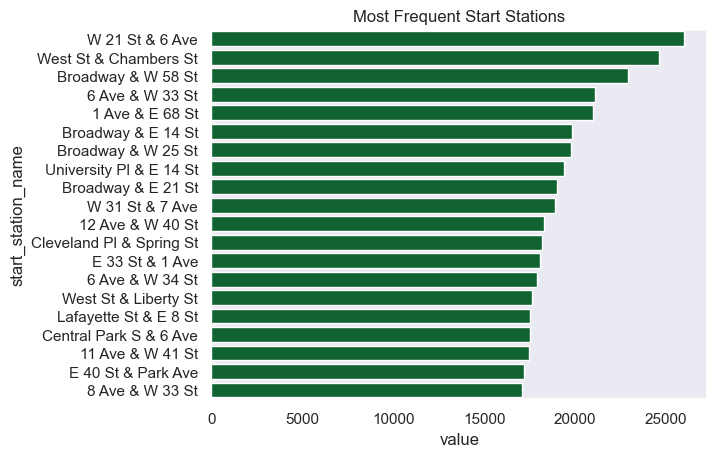

In [130]:
#making a bar plot of the top 20 start stations 
sns.barplot(data = top_20_start_stations, x = 'value', y = 'start_station_name')
plt.title("Most Frequent Start Stations")
plt.show()

C:\Users\canam\AppData\Local\Temp\ipykernel_7224\2701097394.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_20_start_stations, x = 'value', y = 'start_station_name', palette=("BuGn_r"))


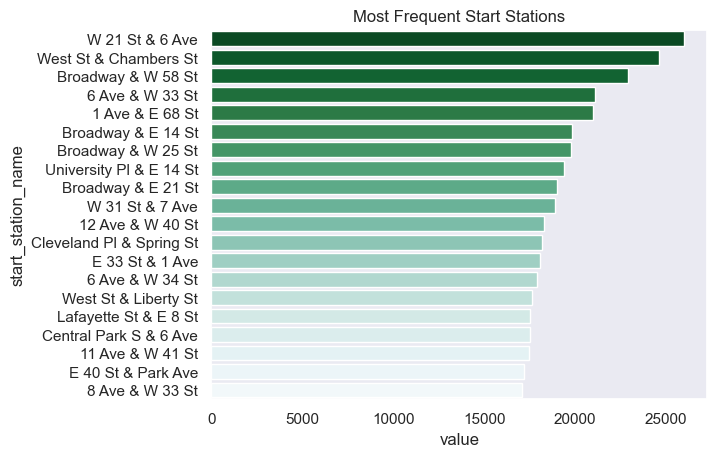

In [134]:
#all bars are the same color in the plot above, so I'm assigning a palette in sns.barplot() 
sns.barplot(data = top_20_start_stations, x = 'value', y = 'start_station_name', palette=("BuGn_r"))
plt.title("Most Frequent Start Stations")
plt.show()

## Recreating dual-axis line plot using seaborn

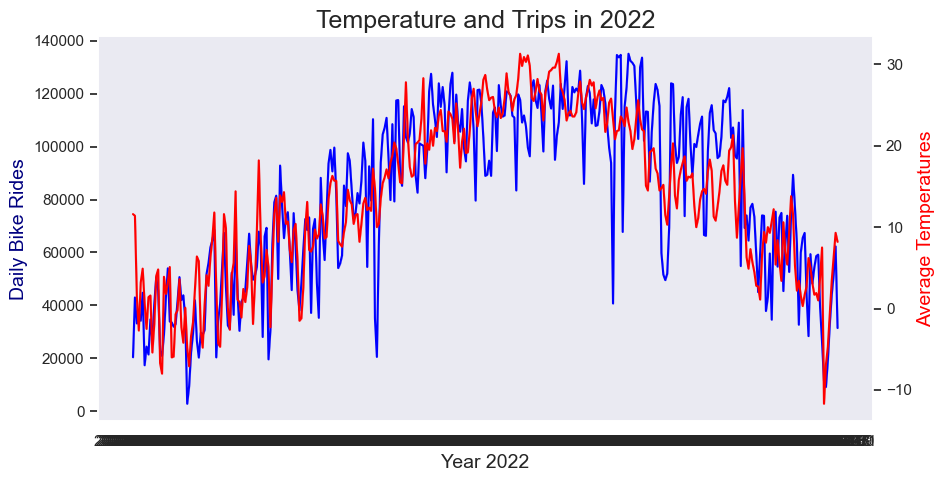

In [77]:
#creating figure and axis objects with subplots 
fig,ax = plt.subplots(figsize=(10, 5))

#creating a plot for daily_bike_rides
sns.lineplot(data = df['daily_bike_rides'], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Daily Bike Rides",color = "navy", fontsize = 14) # set y-axis label

#creating the dual axis 
ax2 = ax.twinx()

#creating a plot for avgTemp
sns.lineplot(data = df['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average Temperatures", color = "red",fontsize=14)
plt.title('Temperature and Trips in 2022', fontsize = 18)
plt.show()

## Creating a box plot

C:\Users\canam\AppData\Local\Temp\ipykernel_7224\3638406027.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'rideable_type', y = 'avgTemp', data = df, palette = ('BuGn_r'))


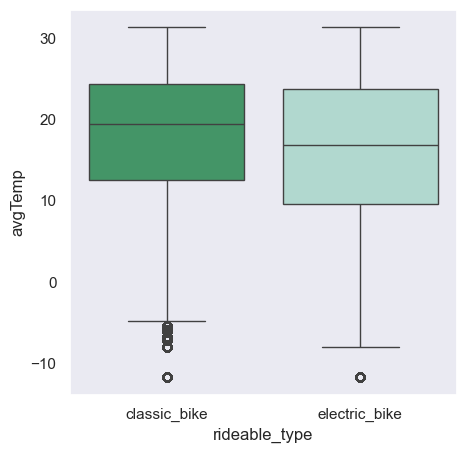

In [138]:
plt.figure(figsize=(5,5))
sns.boxplot(x = 'rideable_type', y = 'avgTemp', data = df, palette = ('BuGn_r'))
plt.show()

The median temperature for classic bikes is higher than the temperature for electric bikes.  Classic bikes also have a higher minimum temperature than electric bikes.  The maximum temperature seems to be the same for both types of bikes.  For classic bikes, the median average temperature is closer to Q3, which means the overall temperature distribution is left-skewed.  For electric bikes, the median is the same distance from Q1 and Q3, meaning temperature distribution is fairly even.  There are more outliers for classic bikes than there are for electric bikes.                    

In [108]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'daily_bike_rides', '_merge', 'value'],
      dtype='object')

In [112]:
df.rename(columns = {'member_casual':'user_type'}, inplace = True)

In [114]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'user_type', 'avgTemp', 'daily_bike_rides', '_merge', 'value'],
      dtype='object')

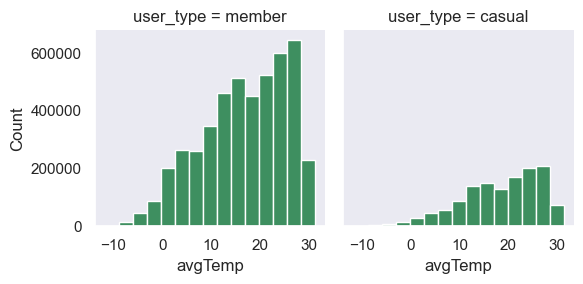

In [117]:
grid = sns.FacetGrid(df, col = "user_type")
grid.map(sns.histplot, "avgTemp", bins = 15)
plt.show()

There are many more member riders than there are casual riders.  Both member riders and casual riders ride more in higher temperatures.  Casual riders very rarely ride in temperatures below 0.  Members ride in temperatures down to -10.  